# Interrupcion Legal de Embarazo CDMX

### Vista general de datos

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

pd.set_option('display.max_rows', 50)
embarazo = pd.read_csv("/Users/iboa08/Desktop/ML/interrupcion-legal-del-embarazo.csv", engine="python")        


### Mini limpieza de datos

In [24]:
embarazoTest = embarazo

embarazoTest = embarazoTest.drop("AUTOREF", axis=1)
embarazoTest = embarazoTest.drop("H_FINGRESO", axis=1)
embarazoTest = embarazoTest.drop("P_CONSENT", axis=1)
#embarazoTest = embarazoTest.drop("PARENTEZCO", axis=1)
embarazoTest = embarazoTest.drop("MENARCA", axis=1)
embarazoTest = embarazoTest.drop("FSEXUAL", axis=1)
embarazoTest = embarazoTest.drop("SEMEMB", axis=1)
embarazoTest = embarazoTest.drop("GESTA", axis=1)
embarazoTest = embarazoTest.drop("NABORTO", axis=1)
#embarazoTest = embarazoTest.drop("NPARTOS", axis=1)
embarazoTest = embarazoTest.drop("NCESAREA", axis=1)
embarazoTest = embarazoTest.drop("C_NUM", axis=1)
embarazoTest = embarazoTest.drop("P_SEMGEST", axis=1)
embarazoTest = embarazoTest.drop("P_DIASGESTA", axis=1)
embarazoTest = embarazoTest.drop("PROCILE", axis=1)
embarazoTest = embarazoTest.drop("S_COMPLICA", axis=1)
embarazoTest = embarazoTest.drop("PANTICONCEP", axis=1)
embarazoTest = embarazoTest.drop("DESC_SERVICIO", axis=1)
embarazoTest = embarazoTest.drop("MOTILES", axis=1)
embarazoTest = embarazoTest.drop("ANTICONCEPTIVO", axis=1)
embarazoTest = embarazoTest.drop("CONSEJERIA", axis=1)
#embarazoTest = embarazoTest.drop("ALC O MUNICIPIO", axis=1)
embarazoTest = embarazoTest.drop("FMENSTRUA", axis=1)
#embarazoTest = embarazoTest.drop("NHIJOS", axis=1)
embarazoTest = embarazoTest.drop("DESC_DERECHOHAB", axis=1)
embarazoTest = embarazoTest.drop("FINGRESO", axis=1)


embarazoTest['OCUPACION'] = embarazoTest.OCUPACION.fillna('No se dijo')
embarazoTest['NILE'] = embarazoTest.NILE.fillna(0)
dict = {"preparatoria completa": "PREPACOM", "secundaria completa": "SECCOM",
       "licenciatura completa": "LICCOM", "primaria completa": "PRIMCOM", 
       "preparatoria incompleta": "PREPINC", "licenciatura incompleta": "LICINC",
       "secundaria incompleta": "SECINC", "ninguno": "NINGUNO"}
embarazoTest = embarazoTest.replace({"NIVEL_EDU": dict})
dict = {"Obrera": "Otro", "Secrataria": "Otro",
       "Cajera": "Otro", "Enfermera": "Otro", 
       "Cocinera": "Otro", "Recepcionista": "Otro",
       "Dentista": "Otro", "Abogada": "Otro",
       "Artista": "Otro","Contadora": "Otro",
       "Textil": "Otro","Periodista o Publicista": "Otro",
       "Administradora": "Otro","Ejecutiva": "Otro",
       "Capturista": "Otro","Voluntaria o Trabajadora Social": "Otro","Trabajadora Sexual": "Otro",
       "Vetarinaria": "Otro","Telefonista": "Otro","Arquitecta": "Otro","Fisioterapeuta": "Otro",
        "Constructura o Elecetricista": "Otro","Ingeniera": "Otro",
       "Bibliotecaria": "Otro","Chofer": "Otro","Asesora financiera": "Otro","Auditora": "Otro",
       "Recursos Humanos": "Otro","Polic�a o Seguridad": "Otro","Modelo": "Otro",
       "Log�stica o Eventos": "Otro","Dise�adora": "Otro","Fot�grafa": "Otro","M�dico": "Otro",
       "Psic�loga": "Otro","Nuti�loga": "Otro","Asesora jur�dica": "Otro","Inform�tica o Tecnolog�a": "Otro",
       "Constructora o Elecetricista": "Otro","Mec�nica": "Otro","Trabajadora de campo": "Otro",
        "Cient�fica": "Otro","Param�dico": "Otro","Trabajadora del Sector P�blico": "SectorPublico",
       "Profesora o Educadora": "Otro","Estilista": "Otro","Trabajadora del Hogar": "Otro",
       "Secretaria": "Otro"}
embarazoTest = embarazoTest.replace({"OCUPACION": dict})
embarazoTest = embarazoTest.dropna()


### Explicación limpieza

En la celda anterior se trata de limpiar los datos de una manera que sea útil para su uso dentro de esta libreta. Despúes de haber consultado el diccionario de que significa los nombres de las columnas, se opto por quitar ciertas columnas dignas no necesarias para nuestro proyecto, lo cual reduce la cantidad de atributos totales. Despues se analizó si hay valores faltantes dentro de nuestros datos y se hizo una imputación de los datos, en este caso se hizo la suposición de que dentro de la columna de número de abortos previos, los valores NaN no han tenido un aborto anterior, lo cual se replazo con un 0. Para la columna de ocupación, se creo un nuevo atributo donde en vez de no tener un valor, se aplico el valor de no se dijo. Despues de haber hecho la imputación, se modificaron los datos para agrupar ciertos valores con otros, de esta manera será más fácil de manejar despues.

### Información sobre dataset despues de limpieza

In [25]:
embarazoTest.info()
#embarazoTest.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 15 to 61982
Data columns (total 14 columns):
ANO                     15725 non-null int64
MES                     15725 non-null object
CVE_HOSPITAL            15725 non-null int64
EDOCIVIL_DESCRIPCION    15725 non-null object
EDAD                    15725 non-null int64
NIVEL_EDU               15725 non-null object
OCUPACION               15725 non-null object
RELIGION                15725 non-null object
PARENTEZCO              15725 non-null object
ENTIDAD                 15725 non-null object
ALC O MUNICIPIO         15725 non-null object
NHIJOS                  15725 non-null float64
NPARTOS                 15725 non-null float64
NILE                    15725 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.8+ MB


### Cantidad de abortos por mes

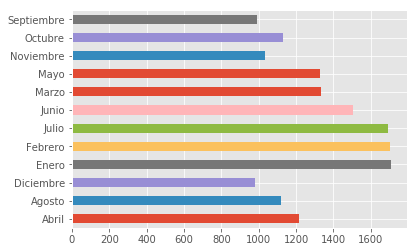

In [26]:
embarazoTest['MES'].value_counts().sort_index().plot.barh()

### Cantidad abortos por mes y edad

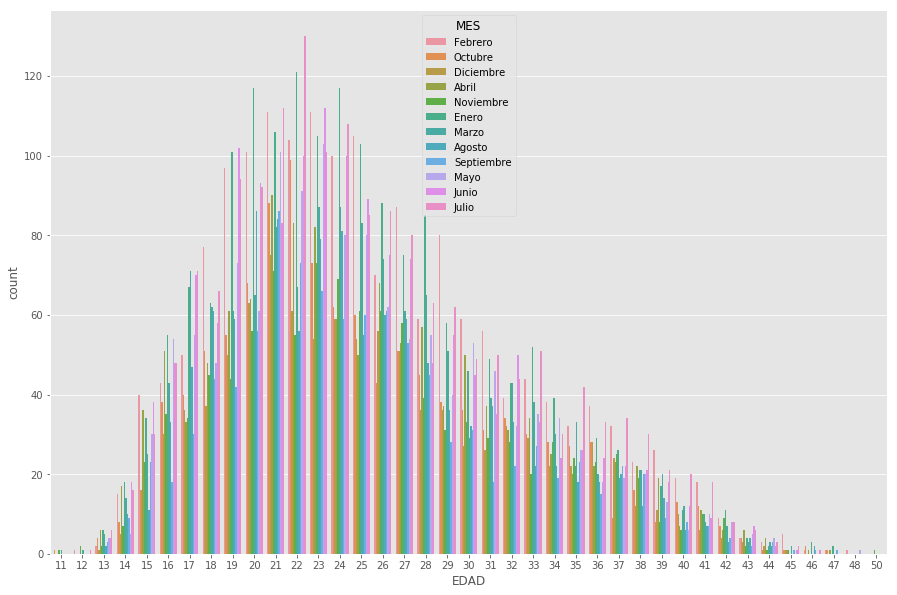

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="MES", data=embarazoTest)

### Cantidad de abortos por mes por hospital

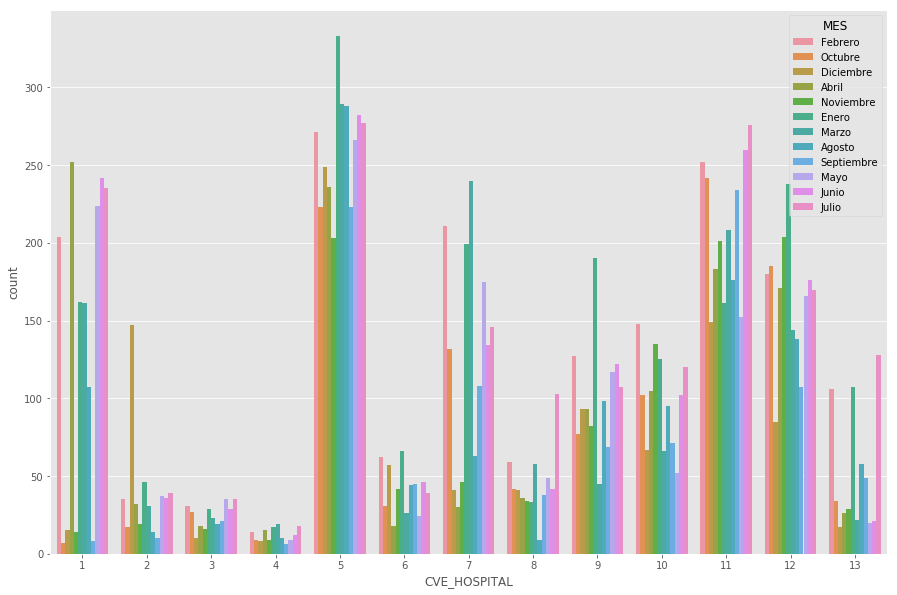

In [28]:
plt.figure(figsize=(15, 10))
sns.countplot(x="CVE_HOSPITAL", hue="MES", data=embarazoTest)

### Cantidad de abortos anteriores por edad

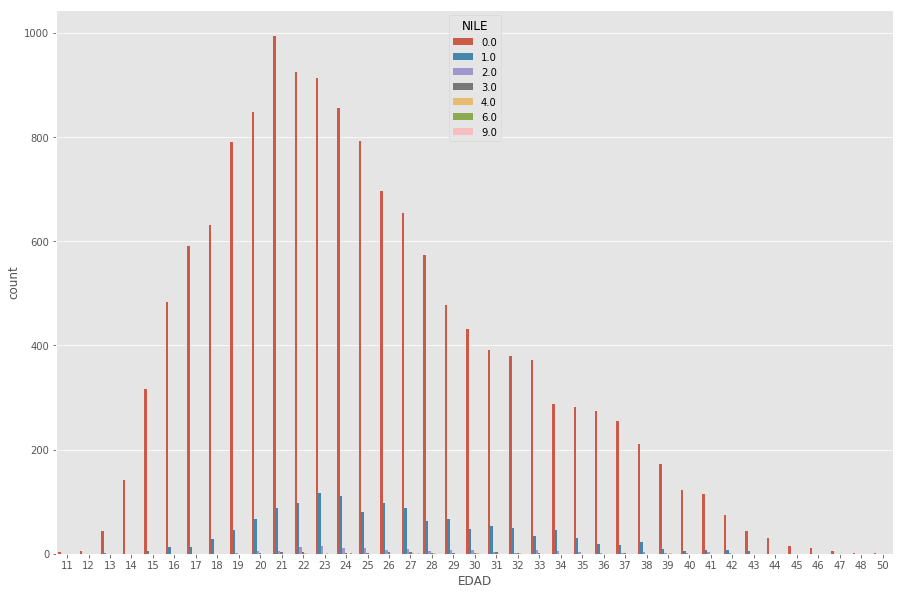

In [29]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="NILE", data=embarazoTest)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Get dummies
X = pd.get_dummies(embarazoTest, prefix_sep='_', drop_first=True)
#X = StandardScaler().fit_transform(X)

#separando los conjuntos de los data en training y testing 
y = X.CVE_HOSPITAL
x = X.drop('CVE_HOSPITAL',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random",  min_samples_split = 5)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred

array([ 5, 12,  5, ..., 12,  1,  5])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[424   5   0   9   6   8   3   2   1   9  26   4  13]
 [ 17  73   1   6  13   3   0  10   6   2   3   4   0]
 [  2   0  35   2   6   1  12   1   2   3   9   3   2]
 [  6  22   0   9   6   0   1   2   0   0   3   0   0]
 [  5  23   2   5 814   8   9   2   5  19  31  11   5]
 [  2   2   0   0   8 114   1   0   0   0   1   7  10]
 [  3   3   6   0  15   5 348   2   2   3  14   9   7]
 [  1   7   1   4   1   1   0  81  19  19  24   3   3]
 [  0   2   0   0   7   1   0  21 233  25  76   0   2]
 [ 13   2   4   0  32   0   5  14  20 203  51   3   2]
 [ 33  11  12   5  42   4  12  31 117  55 409  46  10]
 [  6   7   6   0  17   5   3   3   5   5  35 478  26]
 [  7   0   0   0   4  13   9   1   1   1   4  29 110]]
              precision    recall  f1-score   support

           1       0.82      0.83      0.82       510
           2       0.46      0.53      0.49       138
           3       0.52      0.45      0.48        78
           4       0.23      0.18      0.20        49
           5 

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7060194997880458


In [34]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred

array([ 5.,  5.,  5., ..., 12., 10.,  5.])